In [5]:
%matplotlib inline


# 3D animation


An animated plot in 3D.



In [13]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)

    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData

Gen_RandLine(3, 2)


array([[0.7003673 , 0.72129531, 0.76907384],
       [0.74275081, 0.74942536, 0.77005885]])

Line2D(_line0)
[<mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000017FAA0C5C70>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000017FACC5D490>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000017FAC7040D0>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000017FA90A9040>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000017FAA0C5E80>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000017FAC70BFD0>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000017FAC70B790>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000017FACC35AF0>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000017FACC35670>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000017FACC35CA0>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000017FACC35970>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000017FAC8D5FA0>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000017FAC8D5C40>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000017FAC8A91F0>, <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000017FAC8A9

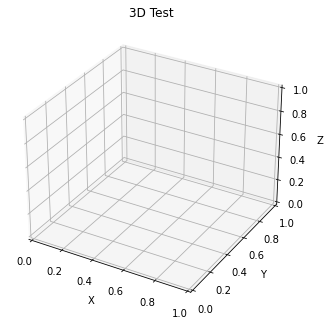

In [15]:

def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num]) #updating x,y
        line.set_3d_properties(data[2, :num]) #updating z
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

dat = data[0]
print(ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0])

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]
print(lines)
# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()